In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('D:\workspace\MachineLearning\Datasets\Datasets\simp_clust.csv', index_col=0)
df

,X1,X2
Name,,
A,23,150
B,24,167
C,67,256
D,65,240
E,12,102
F,11,96
G,15,112
H,10,100
I,34,156


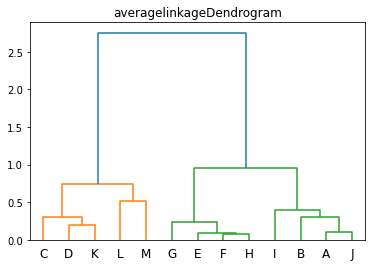

In [3]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
link="average"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,labels=list(df_scaled.index))
plt.title(link+"linkage"+ "Dendrogram")
plt.show()

## Using Sklearn

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [5]:
milk = pd.read_csv('D:\workspace\MachineLearning\Datasets\Datasets\milk.csv',index_col= 0)

In [6]:
scaler = StandardScaler()
milk_scaled = scaler.fit_transform(milk)

In [7]:
list =[]
linkage=['average','ward','complete','single']
for i in range(2,8):
    for d in linkage:
        clust = AgglomerativeClustering(n_clusters=i,linkage=d)
        clust.fit(milk_scaled)
        list.append([i,d,silhouette_score(milk_scaled,clust.labels_)])

df_scores = pd.DataFrame(list,columns=['clusters','linkage','score'])
df_scores.sort_values('score',ascending=False)


,clusters,linkage,score
5,3,ward,0.539160
1,2,ward,0.525851
0,2,average,0.518685
3,2,single,0.518685
4,3,average,0.487576
6,3,complete,0.487576
2,2,complete,0.455789
9,4,ward,0.443481
18,6,complete,0.419614
8,4,average,0.416015


In [8]:
nutrient = pd.read_csv(r"D:\workspace\MachineLearning\Datasets\Datasets\nutrient.csv",index_col=0)
nutrient

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7
CHICKEN BROILED,115,20,3,8,1.4
CHICKEN CANNED,170,25,7,12,1.5
BEEF HEART,160,26,5,14,5.9
LAMB LEG ROAST,265,20,20,9,2.6


In [9]:
scaler = StandardScaler()
nutrient_scaled = scaler.fit_transform(nutrient)

In [10]:
for i in range(2,8):
    print(i)

2
3
4
5
6
7


In [11]:
list =[]
linkage=['average','ward','complete','single']
for i in range(2,8):
    for d in linkage:
        clust = AgglomerativeClustering(n_clusters=i,linkage=d)
        clust.fit(nutrient_scaled)
        list.append([i,d,silhouette_score(nutrient_scaled,clust.labels_)])

df_scores = pd.DataFrame(list,columns=['clusters','linkage','score'])
df_scores.sort_values('score',ascending=False)

,clusters,linkage,score
3,2,single,0.448342
4,3,average,0.445319
7,3,single,0.445319
9,4,ward,0.415801
10,4,complete,0.415801
0,2,average,0.413451
5,3,ward,0.403730
6,3,complete,0.403730
14,5,complete,0.400003
12,5,average,0.400003
